## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9530080	total: 57.1ms	remaining: 57.1s
1:	learn: 0.9346508	total: 58.1ms	remaining: 29s
2:	learn: 0.9162044	total: 59ms	remaining: 19.6s
3:	learn: 0.9010255	total: 60ms	remaining: 14.9s
4:	learn: 0.8842426	total: 60.9ms	remaining: 12.1s
5:	learn: 0.8693080	total: 62.2ms	remaining: 10.3s
6:	learn: 0.8524656	total: 63.5ms	remaining: 9.01s
7:	learn: 0.8368826	total: 64.7ms	remaining: 8.02s
8:	learn: 0.8226512	total: 65.5ms	remaining: 7.21s
9:	learn: 0.8076212	total: 66.3ms	remaining: 6.57s
10:	learn: 0.7924925	total: 67.2ms	remaining: 6.04s
11:	learn: 0.7782980	total: 68.1ms	remaining: 5.61s
12:	learn: 0.7645884	total: 69ms	remaining: 5.24s
13:	learn: 0.7500684	total: 69.8ms	remaining: 4.92s
14:	learn: 0.7384235	total: 70.7ms	remaining: 4.64s
15:	learn: 0.7248382	total: 71.6ms	remaining: 4.4s
16:	learn: 0.7139125	total: 72.4ms	remaining: 4.19s
17:	learn: 0.7025306	total: 73.3ms	remaining: 4s
18:	learn: 0.6906140	total: 74.1ms	remaining: 3.83s
19:	

49:	learn: 0.4615749	total: 103ms	remaining: 1.95s
50:	learn: 0.4568280	total: 104ms	remaining: 1.93s
51:	learn: 0.4504783	total: 104ms	remaining: 1.9s
52:	learn: 0.4447111	total: 105ms	remaining: 1.88s
53:	learn: 0.4414163	total: 106ms	remaining: 1.86s
54:	learn: 0.4370352	total: 107ms	remaining: 1.84s
55:	learn: 0.4335810	total: 108ms	remaining: 1.82s
56:	learn: 0.4290250	total: 109ms	remaining: 1.8s
57:	learn: 0.4251045	total: 110ms	remaining: 1.79s
58:	learn: 0.4209046	total: 111ms	remaining: 1.77s
59:	learn: 0.4170848	total: 112ms	remaining: 1.75s
60:	learn: 0.4132335	total: 113ms	remaining: 1.73s
61:	learn: 0.4089367	total: 114ms	remaining: 1.72s
62:	learn: 0.4065134	total: 114ms	remaining: 1.7s
63:	learn: 0.4030714	total: 115ms	remaining: 1.69s
64:	learn: 0.3998096	total: 116ms	remaining: 1.67s
65:	learn: 0.3956267	total: 117ms	remaining: 1.66s
66:	learn: 0.3909945	total: 118ms	remaining: 1.64s
67:	learn: 0.3870381	total: 119ms	remaining: 1.63s
68:	learn: 0.3838003	total: 119ms	

151:	learn: 0.2538799	total: 191ms	remaining: 1.07s
152:	learn: 0.2533387	total: 192ms	remaining: 1.06s
153:	learn: 0.2528687	total: 193ms	remaining: 1.06s
154:	learn: 0.2521271	total: 194ms	remaining: 1.06s
155:	learn: 0.2514140	total: 195ms	remaining: 1.05s
156:	learn: 0.2507969	total: 196ms	remaining: 1.05s
157:	learn: 0.2497847	total: 197ms	remaining: 1.05s
158:	learn: 0.2486889	total: 197ms	remaining: 1.04s
159:	learn: 0.2481348	total: 198ms	remaining: 1.04s
160:	learn: 0.2473491	total: 199ms	remaining: 1.04s
161:	learn: 0.2465378	total: 200ms	remaining: 1.03s
162:	learn: 0.2458546	total: 201ms	remaining: 1.03s
163:	learn: 0.2452693	total: 202ms	remaining: 1.03s
164:	learn: 0.2447189	total: 202ms	remaining: 1.02s
165:	learn: 0.2438955	total: 203ms	remaining: 1.02s
166:	learn: 0.2433603	total: 204ms	remaining: 1.02s
167:	learn: 0.2427373	total: 205ms	remaining: 1.01s
168:	learn: 0.2422287	total: 206ms	remaining: 1.01s
169:	learn: 0.2411981	total: 207ms	remaining: 1.01s
170:	learn: 

269:	learn: 0.1887091	total: 293ms	remaining: 793ms
270:	learn: 0.1882651	total: 294ms	remaining: 792ms
271:	learn: 0.1876934	total: 295ms	remaining: 790ms
272:	learn: 0.1872873	total: 296ms	remaining: 789ms
273:	learn: 0.1866776	total: 297ms	remaining: 787ms
274:	learn: 0.1862396	total: 298ms	remaining: 785ms
275:	learn: 0.1857127	total: 299ms	remaining: 783ms
276:	learn: 0.1851695	total: 300ms	remaining: 783ms
277:	learn: 0.1849128	total: 301ms	remaining: 782ms
278:	learn: 0.1845356	total: 302ms	remaining: 781ms
279:	learn: 0.1840515	total: 303ms	remaining: 779ms
280:	learn: 0.1837334	total: 304ms	remaining: 777ms
281:	learn: 0.1835376	total: 304ms	remaining: 775ms
282:	learn: 0.1832487	total: 305ms	remaining: 773ms
283:	learn: 0.1830459	total: 306ms	remaining: 772ms
284:	learn: 0.1827715	total: 307ms	remaining: 770ms
285:	learn: 0.1822628	total: 308ms	remaining: 768ms
286:	learn: 0.1818343	total: 309ms	remaining: 767ms
287:	learn: 0.1814604	total: 310ms	remaining: 765ms
288:	learn: 

370:	learn: 0.1561070	total: 382ms	remaining: 648ms
371:	learn: 0.1558768	total: 383ms	remaining: 647ms
372:	learn: 0.1554378	total: 384ms	remaining: 646ms
373:	learn: 0.1551617	total: 385ms	remaining: 644ms
374:	learn: 0.1550916	total: 386ms	remaining: 643ms
375:	learn: 0.1550236	total: 387ms	remaining: 642ms
376:	learn: 0.1549430	total: 387ms	remaining: 640ms
377:	learn: 0.1545546	total: 388ms	remaining: 639ms
378:	learn: 0.1541376	total: 389ms	remaining: 637ms
379:	learn: 0.1539395	total: 390ms	remaining: 636ms
380:	learn: 0.1536155	total: 391ms	remaining: 635ms
381:	learn: 0.1534869	total: 391ms	remaining: 633ms
382:	learn: 0.1530826	total: 392ms	remaining: 632ms
383:	learn: 0.1527510	total: 393ms	remaining: 631ms
384:	learn: 0.1523086	total: 394ms	remaining: 630ms
385:	learn: 0.1519285	total: 395ms	remaining: 629ms
386:	learn: 0.1516234	total: 396ms	remaining: 627ms
387:	learn: 0.1512361	total: 397ms	remaining: 626ms
388:	learn: 0.1510438	total: 398ms	remaining: 625ms
389:	learn: 

489:	learn: 0.1271578	total: 484ms	remaining: 504ms
490:	learn: 0.1268646	total: 485ms	remaining: 502ms
491:	learn: 0.1268318	total: 485ms	remaining: 501ms
492:	learn: 0.1265601	total: 486ms	remaining: 500ms
493:	learn: 0.1263617	total: 487ms	remaining: 499ms
494:	learn: 0.1261625	total: 488ms	remaining: 498ms
495:	learn: 0.1260240	total: 489ms	remaining: 496ms
496:	learn: 0.1256673	total: 490ms	remaining: 496ms
497:	learn: 0.1256219	total: 491ms	remaining: 495ms
498:	learn: 0.1253258	total: 492ms	remaining: 493ms
499:	learn: 0.1252896	total: 492ms	remaining: 492ms
500:	learn: 0.1250731	total: 493ms	remaining: 491ms
501:	learn: 0.1247737	total: 494ms	remaining: 490ms
502:	learn: 0.1245947	total: 495ms	remaining: 489ms
503:	learn: 0.1243715	total: 496ms	remaining: 488ms
504:	learn: 0.1241716	total: 497ms	remaining: 487ms
505:	learn: 0.1239984	total: 498ms	remaining: 486ms
506:	learn: 0.1238466	total: 498ms	remaining: 485ms
507:	learn: 0.1235894	total: 499ms	remaining: 483ms
508:	learn: 

586:	learn: 0.1083290	total: 571ms	remaining: 402ms
587:	learn: 0.1081449	total: 573ms	remaining: 401ms
588:	learn: 0.1079377	total: 573ms	remaining: 400ms
589:	learn: 0.1078833	total: 574ms	remaining: 399ms
590:	learn: 0.1078496	total: 575ms	remaining: 398ms
591:	learn: 0.1077566	total: 576ms	remaining: 397ms
592:	learn: 0.1075284	total: 577ms	remaining: 396ms
593:	learn: 0.1073635	total: 578ms	remaining: 395ms
594:	learn: 0.1072375	total: 578ms	remaining: 394ms
595:	learn: 0.1070224	total: 579ms	remaining: 393ms
596:	learn: 0.1069857	total: 580ms	remaining: 392ms
597:	learn: 0.1067647	total: 581ms	remaining: 391ms
598:	learn: 0.1065213	total: 582ms	remaining: 389ms
599:	learn: 0.1063602	total: 583ms	remaining: 388ms
600:	learn: 0.1063408	total: 584ms	remaining: 388ms
601:	learn: 0.1061698	total: 585ms	remaining: 387ms
602:	learn: 0.1058883	total: 586ms	remaining: 386ms
603:	learn: 0.1056040	total: 587ms	remaining: 385ms
604:	learn: 0.1054057	total: 588ms	remaining: 384ms
605:	learn: 

698:	learn: 0.0912691	total: 672ms	remaining: 290ms
699:	learn: 0.0910793	total: 674ms	remaining: 289ms
700:	learn: 0.0909287	total: 675ms	remaining: 288ms
701:	learn: 0.0907938	total: 676ms	remaining: 287ms
702:	learn: 0.0906536	total: 677ms	remaining: 286ms
703:	learn: 0.0905519	total: 678ms	remaining: 285ms
704:	learn: 0.0904581	total: 679ms	remaining: 284ms
705:	learn: 0.0903090	total: 680ms	remaining: 283ms
706:	learn: 0.0902376	total: 681ms	remaining: 282ms
707:	learn: 0.0901250	total: 682ms	remaining: 281ms
708:	learn: 0.0899609	total: 683ms	remaining: 280ms
709:	learn: 0.0898056	total: 683ms	remaining: 279ms
710:	learn: 0.0896844	total: 684ms	remaining: 278ms
711:	learn: 0.0895853	total: 685ms	remaining: 277ms
712:	learn: 0.0894337	total: 686ms	remaining: 276ms
713:	learn: 0.0893200	total: 687ms	remaining: 275ms
714:	learn: 0.0890854	total: 688ms	remaining: 274ms
715:	learn: 0.0890219	total: 689ms	remaining: 273ms
716:	learn: 0.0889191	total: 689ms	remaining: 272ms
717:	learn: 

803:	learn: 0.0784310	total: 762ms	remaining: 186ms
804:	learn: 0.0784157	total: 763ms	remaining: 185ms
805:	learn: 0.0783497	total: 764ms	remaining: 184ms
806:	learn: 0.0782201	total: 765ms	remaining: 183ms
807:	learn: 0.0780739	total: 766ms	remaining: 182ms
808:	learn: 0.0779550	total: 766ms	remaining: 181ms
809:	learn: 0.0778510	total: 767ms	remaining: 180ms
810:	learn: 0.0777229	total: 768ms	remaining: 179ms
811:	learn: 0.0775100	total: 769ms	remaining: 178ms
812:	learn: 0.0774391	total: 770ms	remaining: 177ms
813:	learn: 0.0773327	total: 771ms	remaining: 176ms
814:	learn: 0.0771874	total: 772ms	remaining: 175ms
815:	learn: 0.0770898	total: 772ms	remaining: 174ms
816:	learn: 0.0770217	total: 773ms	remaining: 173ms
817:	learn: 0.0769767	total: 774ms	remaining: 172ms
818:	learn: 0.0769249	total: 775ms	remaining: 171ms
819:	learn: 0.0768383	total: 776ms	remaining: 170ms
820:	learn: 0.0767537	total: 777ms	remaining: 169ms
821:	learn: 0.0766436	total: 778ms	remaining: 168ms
822:	learn: 

915:	learn: 0.0676814	total: 863ms	remaining: 79.2ms
916:	learn: 0.0675380	total: 864ms	remaining: 78.2ms
917:	learn: 0.0673852	total: 865ms	remaining: 77.3ms
918:	learn: 0.0672876	total: 866ms	remaining: 76.3ms
919:	learn: 0.0671471	total: 867ms	remaining: 75.4ms
920:	learn: 0.0670349	total: 868ms	remaining: 74.4ms
921:	learn: 0.0668857	total: 869ms	remaining: 73.5ms
922:	learn: 0.0667982	total: 869ms	remaining: 72.5ms
923:	learn: 0.0667184	total: 870ms	remaining: 71.6ms
924:	learn: 0.0666474	total: 871ms	remaining: 70.6ms
925:	learn: 0.0665329	total: 872ms	remaining: 69.7ms
926:	learn: 0.0665168	total: 873ms	remaining: 68.7ms
927:	learn: 0.0664327	total: 874ms	remaining: 67.8ms
928:	learn: 0.0663807	total: 874ms	remaining: 66.8ms
929:	learn: 0.0662620	total: 875ms	remaining: 65.9ms
930:	learn: 0.0662138	total: 876ms	remaining: 64.9ms
931:	learn: 0.0661827	total: 877ms	remaining: 64ms
932:	learn: 0.0660943	total: 878ms	remaining: 63ms
933:	learn: 0.0659795	total: 879ms	remaining: 62.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

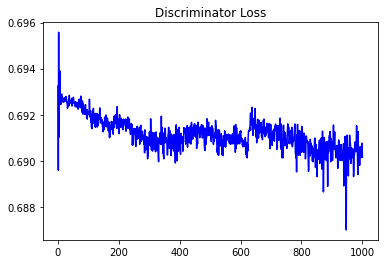

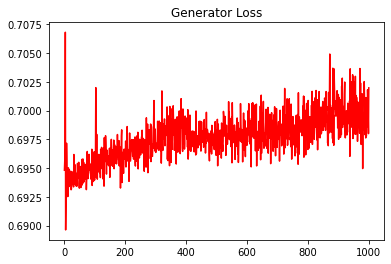

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18978887815347162


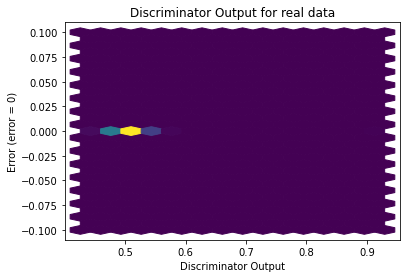

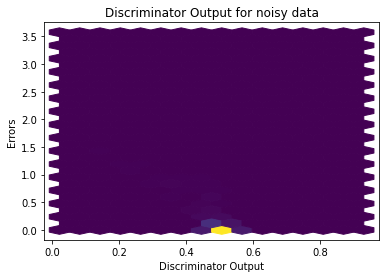

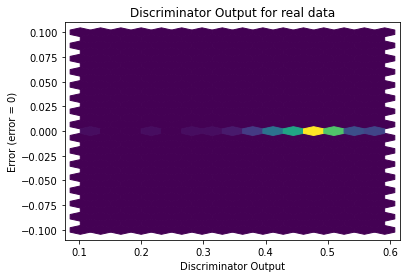

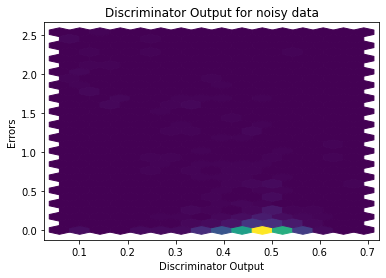

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


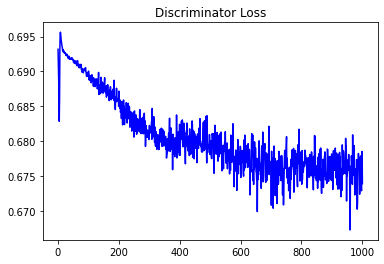

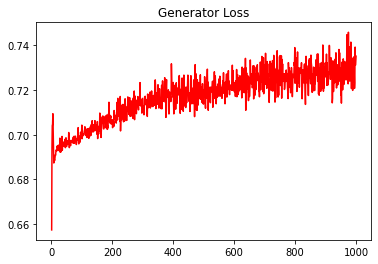

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13236910846125563


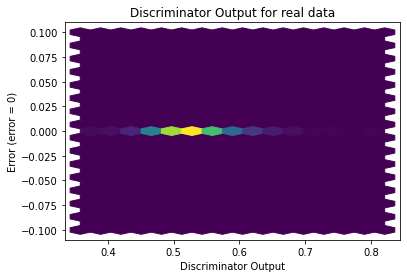

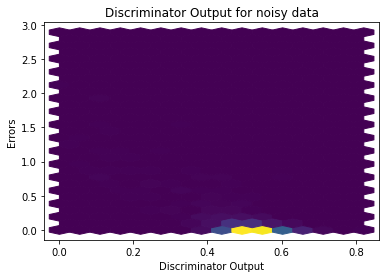

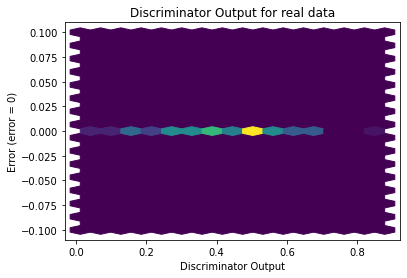

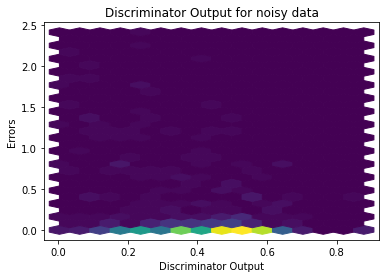

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3498]], requires_grad=True)
